In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pdData = pd.read_csv('data/LogiReg_data.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
pdData.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
pdData.shape

(100, 3)

Text(0,0.5,'Exam 2 score')

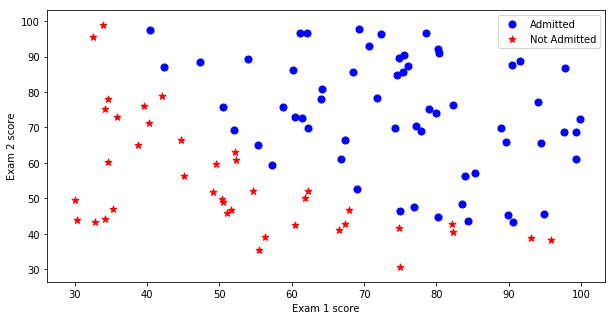

In [4]:
positive = pdData[pdData['Admitted'] == 1]
negative = pdData[pdData['Admitted'] == 0]

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted' )
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='*', label='Not Admitted' )
ax.legend()
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

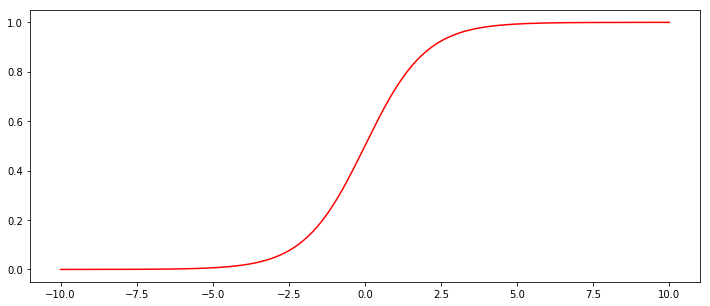

In [6]:
x = np.linspace(-10, 10, 1000)
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(x, sigmoid(x), 'r')

In [11]:
def model(X, theta):
    return sigmoid(np.dot(X, theta.T))

In [7]:
pdData.insert(0, 'ones', 1)

In [8]:
pdData.head()

,ones,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [9]:
orig_data = pdData.as_matrix()
orig_data

array([[ 1.        , 34.62365962, 78.02469282,  0.        ],
       [ 1.        , 30.28671077, 43.89499752,  0.        ],
       [ 1.        , 35.84740877, 72.90219803,  0.        ],
       [ 1.        , 60.18259939, 86.3085521 ,  1.        ],
       [ 1.        , 79.03273605, 75.34437644,  1.        ],
       [ 1.        , 45.08327748, 56.31637178,  0.        ],
       [ 1.        , 61.10666454, 96.51142588,  1.        ],
       [ 1.        , 75.02474557, 46.55401354,  1.        ],
       [ 1.        , 76.0987867 , 87.42056972,  1.        ],
       [ 1.        , 84.43281996, 43.53339331,  1.        ],
       [ 1.        , 95.86155507, 38.22527806,  0.        ],
       [ 1.        , 75.01365839, 30.60326323,  0.        ],
       [ 1.        , 82.30705337, 76.4819633 ,  1.        ],
       [ 1.        , 69.36458876, 97.71869196,  1.        ],
       [ 1.        , 39.53833914, 76.03681085,  0.        ],
       [ 1.        , 53.97105215, 89.20735014,  1.        ],
       [ 1.        , 69.

In [10]:
cols = orig_data.shape[1]
X = orig_data[:,0:cols-1]
y = orig_data[:, cols-1:cols]
theta = np.zeros([1,3])

In [11]:
X[:5]

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644]])

In [12]:
len(X)

100

In [25]:
y[:5]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [33]:
theta.ravel()

(array([0., 0., 0.]), array([[0., 0., 0.]]))

In [27]:
X.shape, y.shape, theta.shape

((100, 3), (100, 1), (1, 3))

In [30]:
def cost(X, y, theta):
    left = np.multiply(-y, np.log(model(X, theta)))
    right = np.multiply(1 - y, np.log(1 - model(X, theta)))
    return np.sum(left - right) / len(X)

In [31]:
cost(X, y, theta)

0.6931471805599453

In [35]:
def gradient(X, y, theta):
    grad = np.zeros(theta.shape)
    error = (model(X, theta) - y).ravel()
    for j in range(len(theta.ravel())):
        term = np.multiply(error, X[:, j])
        grad[0, j] = np.sum(term) / len(X)
    return grad

In [51]:
STOP_ITER = 0
STOP_COST = 1
STOP_GRAD = 2

def stopCriterion(type, value, threshold):
    #设定三种不同的停止策略
    if type == STOP_ITER:        return value > threshold
    elif type == STOP_COST:      return abs(value[-1]-value[-2]) < threshold
    elif type == STOP_GRAD:      return np.linalg.norm(value) < threshold

In [52]:
def shuffleData(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    X = data[:, 0: cols-1]
    y = data[:, cols-1:]
    return X,y

In [53]:
import time

def descent(data, theta, batchSize, stopType, thresh, alpha):
    init_time = time.time()
    i = 0  # 迭代次数
    k = 0  # batch
    X, y = shuffleData(data)
    grad = np.zeros(theta.shape)  # 梯度
    costs = [cost(X, y, theta)] # 损失值
    
    while True:
        grad = gradient(X[k:k+batchSize], y[k:k+batchSize], theta)
        k += batchSize #取batch数量个数据
        if k >= n: 
            k = 0 
            X, y = shuffleData(data) #重新洗牌
        theta = theta - alpha*grad # 参数更新
        costs.append(cost(X, y, theta)) # 计算新的损失
        i += 1 

        if stopType == STOP_ITER:       value = i
        elif stopType == STOP_COST:     value = costs
        elif stopType == STOP_GRAD:     value = grad
        if stopCriterion(stopType, value, thresh): break
    
    return theta, i-1, costs, grad, time.time() - init_time

In [54]:
def runExpe(data, theta, batchSize, stopType, thresh, alpha):
    #import pdb; pdb.set_trace();
    theta, iter, costs, grad, dur = descent(data, theta, batchSize, stopType, thresh, alpha)
    name = "Original" if (data[:,1]>2).sum() > 1 else "Scaled"
    name += " data - learning rate: {} - ".format(alpha)
    if batchSize==n: strDescType = "Gradient"
    elif batchSize==1:  strDescType = "Stochastic"
    else: strDescType = "Mini-batch ({})".format(batchSize)
    name += strDescType + " descent - Stop: "
    if stopType == STOP_ITER: strStop = "{} iterations".format(thresh)
    elif stopType == STOP_COST: strStop = "costs change < {}".format(thresh)
    else: strStop = "gradient norm < {}".format(thresh)
    name += strStop
    print ("***{}\nTheta: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s".format(
        name, theta, iter, costs[-1], dur))
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper() + ' - Error vs. Iteration')
    return theta

***Original data - learning rate: 1e-06 - Gradient descent - Stop: 5000 iterations
Theta: [[-0.00027127  0.00705232  0.00376711]] - Iter: 5000 - Last cost: 0.63 - Duration: 1.00s


array([[-0.00027127,  0.00705232,  0.00376711]])

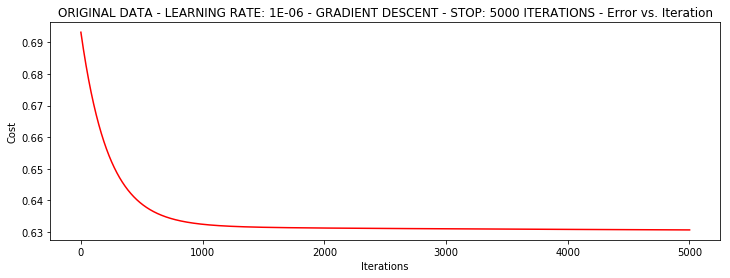

In [55]:
n=100
runExpe(orig_data, theta, n, STOP_ITER, thresh=5000, alpha=0.000001)

***Original data - learning rate: 0.001 - Gradient descent - Stop: costs change < 1e-06
Theta: [[-5.13364014  0.04771429  0.04072397]] - Iter: 109901 - Last cost: 0.38 - Duration: 16.08s


array([[-5.13364014,  0.04771429,  0.04072397]])

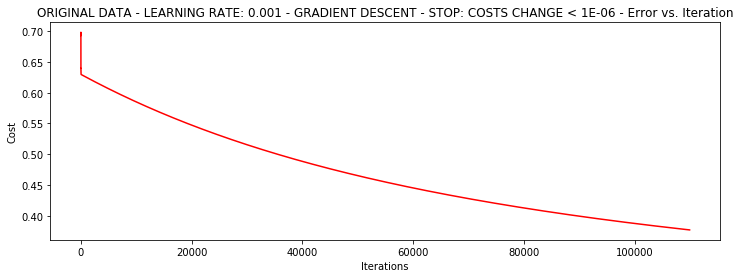

In [56]:
runExpe(orig_data, theta, n, STOP_COST, thresh=0.000001, alpha=0.001)

***Original data - learning rate: 0.001 - Gradient descent - Stop: gradient norm < 0.05
Theta: [[-2.37033409  0.02721692  0.01899456]] - Iter: 40045 - Last cost: 0.49 - Duration: 8.43s


array([[-2.37033409,  0.02721692,  0.01899456]])

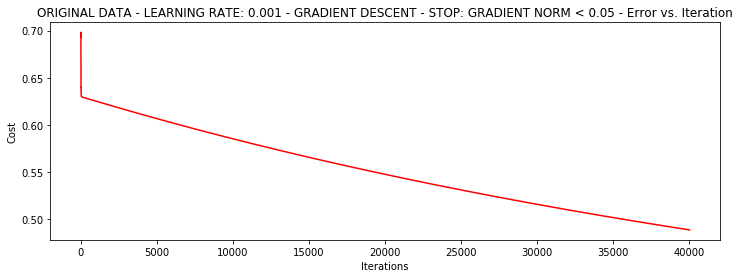

In [57]:
runExpe(orig_data, theta, n, STOP_GRAD, thresh=0.05, alpha=0.001)

***Original data - learning rate: 0.001 - Stochastic descent - Stop: 5000 iterations
Theta: [[-0.37422792  0.10782614 -0.04133588]] - Iter: 5000 - Last cost: 1.30 - Duration: 0.39s


array([[-0.37422792,  0.10782614, -0.04133588]])

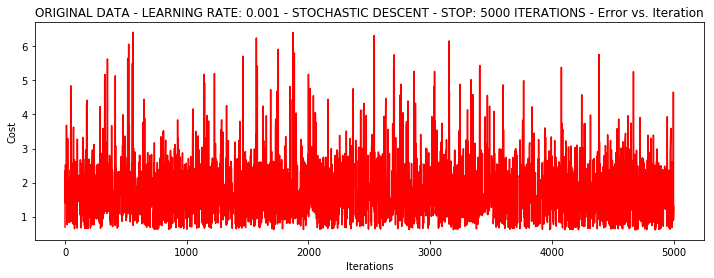

In [58]:
runExpe(orig_data, theta, 1, STOP_ITER, thresh=5000, alpha=0.001)

***Original data - learning rate: 2e-06 - Stochastic descent - Stop: 15000 iterations
Theta: [[-0.00202269  0.00991646  0.0008978 ]] - Iter: 15000 - Last cost: 0.63 - Duration: 1.15s


array([[-0.00202269,  0.00991646,  0.0008978 ]])

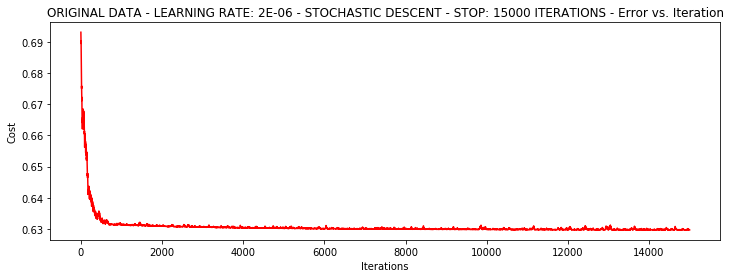

In [59]:
runExpe(orig_data, theta, 1, STOP_ITER, thresh=15000, alpha=0.000002)

***Original data - learning rate: 0.001 - Mini-batch (16) descent - Stop: 15000 iterations
Theta: [[-1.03462485  0.03064873  0.01842184]] - Iter: 15000 - Last cost: 0.75 - Duration: 1.48s


array([[-1.03462485,  0.03064873,  0.01842184]])

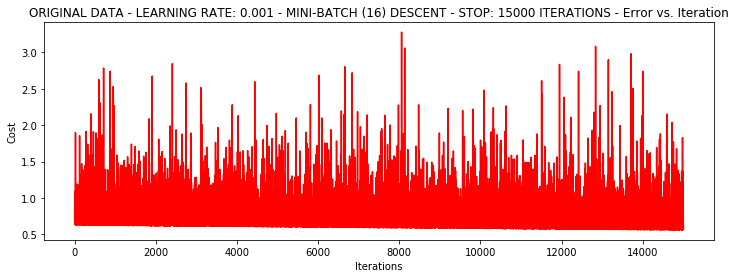

In [60]:
runExpe(orig_data, theta, 16, STOP_ITER, thresh=15000, alpha=0.001)

***Scaled data - learning rate: 0.001 - Gradient descent - Stop: 5000 iterations
Theta: [[0.3080807  0.86494967 0.77367651]] - Iter: 5000 - Last cost: 0.38 - Duration: 1.21s


array([[0.3080807 , 0.86494967, 0.77367651]])

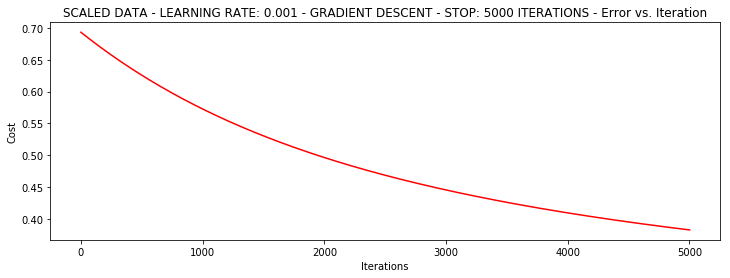

In [61]:
from sklearn import preprocessing as pp

scaled_data = orig_data.copy()
scaled_data[:, 1:3] = pp.scale(orig_data[:, 1:3])

runExpe(scaled_data, theta, n, STOP_ITER, thresh=5000, alpha=0.001)

***Scaled data - learning rate: 0.001 - Gradient descent - Stop: gradient norm < 0.02
Theta: [[1.0707921  2.63030842 2.41079787]] - Iter: 59422 - Last cost: 0.22 - Duration: 13.55s


array([[1.0707921 , 2.63030842, 2.41079787]])

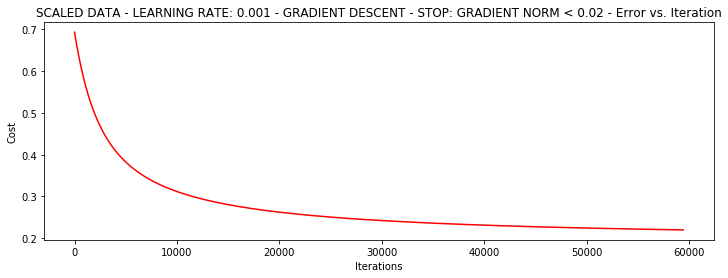

In [62]:
runExpe(scaled_data, theta, n, STOP_GRAD, thresh=0.02, alpha=0.001)

***Scaled data - learning rate: 0.001 - Stochastic descent - Stop: gradient norm < 0.0004
Theta: [[1.14852187 2.79198765 2.56652178]] - Iter: 72593 - Last cost: 0.22 - Duration: 7.53s


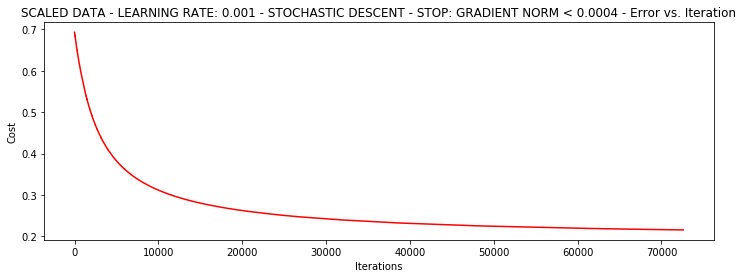

In [63]:
theta = runExpe(scaled_data, theta, 1, STOP_GRAD, thresh=0.002/5, alpha=0.001)

***Scaled data - learning rate: 0.001 - Mini-batch (16) descent - Stop: gradient norm < 0.004
Theta: [[1.16689062 2.83304367 2.59818809]] - Iter: 3422 - Last cost: 0.21 - Duration: 0.48s


array([[1.16689062, 2.83304367, 2.59818809]])

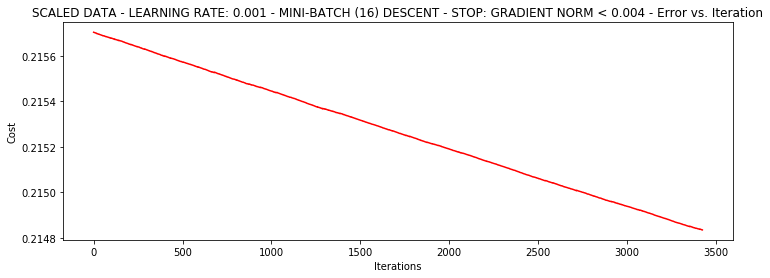

In [64]:
runExpe(scaled_data, theta, 16, STOP_GRAD, thresh=0.002*2, alpha=0.001)

In [65]:
#设定阈值
def predict(X, theta):
    return [1 if x >= 0.5 else 0 for x in model(X, theta)]

In [66]:
scaled_X = scaled_data[:, :3]
y = scaled_data[:, 3]
predictions = predict(scaled_X, theta)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%
